# Dataset
https://www.tensorflow.org/api_docs/python/tf/keras/datasets

In [ ]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

## MNIST
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

### Loading dataset and Coverting labels to categorical form
https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [ ]:
(x_train_1, y_train_1), (x_test_1, y_test_1) = datasets.mnist.load_data()
y_train_1 = to_categorical(y_train_1, num_classes=10)
y_test_1 = to_categorical(y_test_1, num_classes=10)

11490434/11490434 [==============================] - 0s 0us/step


### Train and Test data shapes

In [ ]:
print(x_train_1.shape)
print(y_train_1.shape)

(60000, 28, 28)
(60000, 10)


In [ ]:
print(x_test_1.shape)
print(y_test_1.shape)

(10000, 28, 28)
(10000, 10)


### Showing one the dataset examples

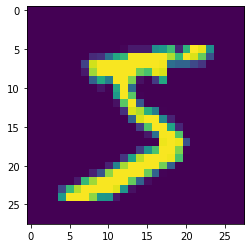

In [ ]:
index = 0
fig, (ax1) = plt.subplots(1, 1)
ax1.imshow(x_train_1[index])

## CIFAR-10
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

### Loading dataset and Coverting labels to categorical form
https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [ ]:
(x_train_2, y_train_2), (x_test_2, y_test_2) = datasets.cifar10.load_data()
y_train_2 = to_categorical(y_train_2, num_classes=10)
y_test_2 = to_categorical(y_test_2, num_classes=10)

170498071/170498071 [==============================] - 11s 0us/step


### Train and Test data shapes

In [ ]:
print(x_train_2.shape)
print(y_train_2.shape)

(50000, 32, 32, 3)
(50000, 10)


In [ ]:
print(x_test_2.shape)
print(y_test_2.shape)

(10000, 32, 32, 3)
(10000, 10)


### Showing one the dataset examples

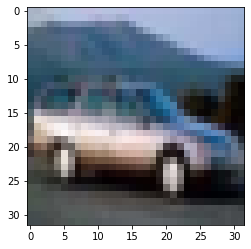

In [ ]:
index = 4
fig, (ax1) = plt.subplots(1, 1)
ax1.imshow(x_train_2[index])

## FER-2013
learn more about FER-2013 dataset:
https://www.kaggle.com/datasets/msambare/fer2013

In [ ]:
!wget -N -q -O "archive.zip" "https://storage.googleapis.com/kaggle-data-sets/786787/1351797/bundle/archive.zip"
!unzip -n -q archive.zip
train_dir = './train/'
test_dir = './test/'

### Image Data Generator
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Create Image Data Generator for Train and Test sets

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2,
)

test_datagen = ImageDataGenerator(rescale=1./255)

#### Use **.flow_from_directory(directory)** to read Train and Test sets

In [ ]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    batch_size=64,
    target_size=(48, 48),
    # shuffle=True,
    color_mode='grayscale',
    class_mode='categorical',
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    batch_size=64,
    target_size=(48, 48),
    # shuffle=True,
    color_mode='grayscale',
    class_mode='categorical',
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
print(train_set)
print(test_set)

# Model
https://www.tensorflow.org/api_docs/python/tf/keras/models

https://www.tensorflow.org/api_docs/python/tf/keras/layers


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

## Sequential
https://www.tensorflow.org/guide/keras/sequential_model

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model_temp_1 = Sequential()

# Input Layer
# Write your code here
model_temp_1.add(layers.Input(shape=(50, 50)))
model_temp_1.add(layers.Flatten())

# Hidden Layer
# Write your code here
model_temp_1.add(layers.Dense(units=128))
model_temp_1.add(layers.Activation('relu'))

# Output Layer
# Write your code here
model_temp_1.add(layers.Dense(units=5))
model_temp_1.add(layers.Activation('softmax'))

### Model Summary
https://www.tensorflow.org/js/guide/models_and_layers#model_summary

In [ ]:
model_temp_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 2500)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               320128    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                                 
 activation_1 (Activation)   (None, 5)                 0         
                                                                 
Total params: 320,773
Trainable params: 320,773
Non-trainable params: 0
_________________________________________________________________


### Plotting Model and Save it as **structure_1.png**
https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model 

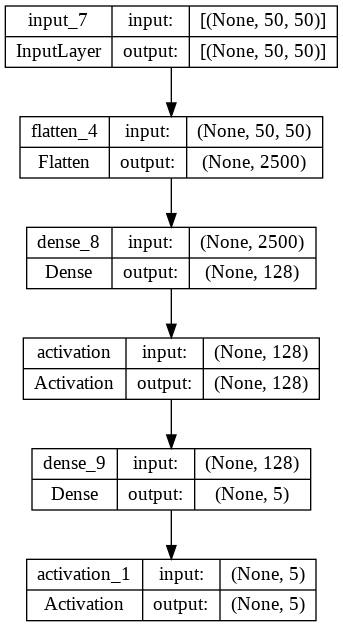

In [ ]:
plot_model(
    model_temp_1,
    to_file="structure_1.png",
    show_shapes=True,
    show_layer_names=True,
)

## Functional API 
https://www.tensorflow.org/guide/keras/functional

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
def model_factory(input_shape, num_classes):
    # Input Layer
    # Write your code here
    i = layers.Input(shape=input_shape)
    x = layers.Flatten()(i)

    # Hidden Layer
    # Write your code here
    x = layers.Dense(units=128)(x)
    x = layers.Activation('relu')(x)

    # Output Layer
    # Write your code here
    x = layers.Dense(units=num_classes)(x)
    o = layers.Activation('softmax')(x)

    return Model(inputs= i, outputs=o)

In [ ]:
model_template_2 = model_factory(
    input_shape=(50, 50),
    num_classes=5,
)

### Model Summary

In [ ]:
model_template_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 50, 50)]          0         
                                                                 
 flatten_6 (Flatten)         (None, 2500)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               320128    
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 5)                 645       
                                                                 
 activation_3 (Activation)   (None, 5)                 0         
                                                                 
Total params: 320,773
Trainable params: 320,773
Non-trainab

### Plotting Model and Save it as **structure_2.png**

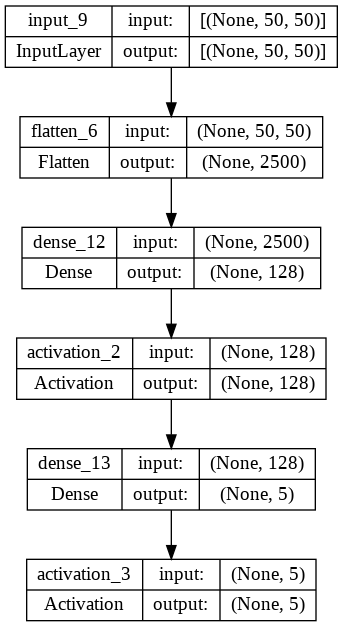

In [ ]:
plot_model(
    model_template_2,
    to_file="structure_2.png",
    show_shapes=True,
    show_layer_names=True,
)

## Optimizers and Loss
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
# Write your code here
sgd_optimizer = SGD(learning_rate=0.01)

## Compile, Fit and Evaluation
https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate

https://keras.io/api/models/model_training_apis/#predict-method

### MNIST

In [ ]:
# Write your code here
model_mnist = model_factory(
    input_shape=x_train_1[0].shape,
    num_classes=y_test_1.shape[-1]
)

# Write your code here
model_mnist.compile(
    loss='categorical_crossentropy',
    optimizer=sgd_optimizer,
    metrics=['accuracy']
)

# Write your code here
history = model_mnist.fit(
   x_train_1, y_train_1,
   batch_size=64,
   epochs=5,
   validation_split=0.2
)

Epoch 1/5
750/750 [==============================] - 4s 4ms/step - loss: 31.0073 - accuracy: 0.3621 - val_loss: 1.6605 - val_accuracy: 0.4062
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 1.5038 - accuracy: 0.4921 - val_loss: 1.2168 - val_accuracy: 0.6077
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 1.3047 - accuracy: 0.5885 - val_loss: 1.2271 - val_accuracy: 0.5813
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 1.2293 - accuracy: 0.5978 - val_loss: 1.3432 - val_accuracy: 0.6206
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 1.2210 - accuracy: 0.5953 - val_loss: 1.2459 - val_accuracy: 0.5658


#### Plotting model Loss and Accuracy on train and validation sets per epoch

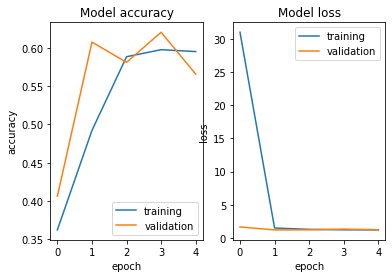

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

#### Evaluating Test set

In [ ]:
# Write your code here
model_mnist.evaluate(
    x_test_1, y_test_1
)

313/313 [==============================] - 1s 2ms/step - loss: 1.2638 - accuracy: 0.5635


[1.2637537717819214, 0.5634999871253967]

#### Predicting Some samples from Test set

313/313 [==============================] - 1s 4ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[4.97e-33 6.88e-26 0.00e+00 9.89e-26 0.00e+00 1.54e-28 0.00e+00 1.00e+00 0.00e+00 2.67e-10]


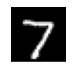

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[7.08e-21 0.00e+00 1.00e+00 1.59e-25 5.22e-17 5.52e-15 7.58e-12 5.60e-10 1.76e-19 6.99e-23]


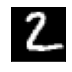

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.89e-22 1.00e+00 3.25e-10 1.60e-15 5.71e-10 1.77e-11 5.84e-09 1.72e-04 2.31e-06 1.55e-06]


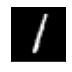

In [ ]:
# Write your code here
y_pred_1 = model_mnist.predict(x_test_1)
np.set_printoptions(precision=2, linewidth=200)
for i in range(3):
    print(y_test_1[i])
    print(y_pred_1[i])
    plt.figure(figsize=(1, 1))
    plt.imshow(x_test_1[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

### FER-2013

In [ ]:
# Write your code here
model_fer = model_factory(
    input_shape=(48, 48),
    num_classes=7
)

# Write your code here
model_fer.compile(
    loss='categorical_crossentropy',
    optimizer=sgd_optimizer,
    metrics=['accuracy']
)

# Write your code here
history = model_fer.fit(
   x=train_set,
   epochs=5,
   validation_data=train_set
)

Epoch 1/5


448/449 [============================>.] - ETA: 0s - loss: 1.8049 - accuracy: 0.2600

449/449 [==============================] - 66s 146ms/step - loss: 1.8049 - accuracy: 0.2604 - val_loss: 1.7708 - val_accuracy: 0.2880
Epoch 2/5
449/449 [==============================] - 65s 145ms/step - loss: 1.7587 - accuracy: 0.2915 - val_loss: 1.7552 - val_accuracy: 0.2902
Epoch 3/5
449/449 [==============================] - 65s 145ms/step - loss: 1.7377 - accuracy: 0.3068 - val_loss: 1.7478 - val_accuracy: 0.2915
Epoch 4/5
449/449 [==============================] - 65s 145ms/step - loss: 1.7269 - accuracy: 0.3162 - val_loss: 1.7133 - val_accuracy: 0.3253
Epoch 5/5
449/449 [==============================] - 45s 100ms/step - loss: 1.7171 - accuracy: 0.3178 - val_loss: 1.7140 - val_accuracy: 0.3156


#### Plotting model Loss and Accuracy on train and validation sets per epoch

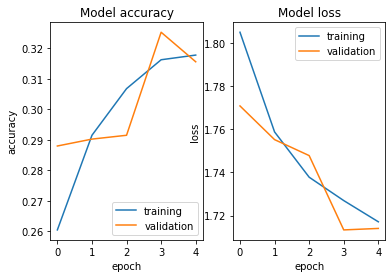

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

#### Evaluating Test set

In [ ]:
model_fer.evaluate(
    x=test_set,
)

113/113 [==============================] - 3s 27ms/step - loss: 1.6945 - accuracy: 0.3338


[1.6944997310638428, 0.33379772305488586]

#### Predicting Some samples from Test set

113/113 [==============================] - 3s 27ms/step


Text(0.5, 1.0, 'label: happy \n actual: fear')

<Figure size 432x288 with 0 Axes>

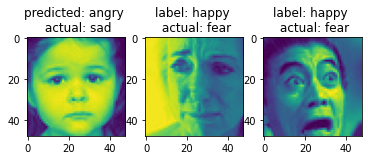

In [ ]:
prediction = model_fer.predict(test_set)
# convert prediction to labels
labels = prediction.argmax(axis=-1)

# labels list
label_list = list(test_set.class_indices.keys())

plt.figure()
f, axarr = plt.subplots(1,3) 

# use the created array to output your multiple images.
axarr[0].imshow(np.squeeze(test_set[0][0][5]))
label_1 = label_list[test_set[0][1][5].argmax(axis=-1)]
axarr[1].imshow(np.squeeze(test_set[0][0][29]))
label_2 = label_list[test_set[0][1][29].argmax(axis=-1)]
axarr[2].imshow(np.squeeze(test_set[0][0][10]))
label_3 = label_list[test_set[0][1][10].argmax(axis=-1)]

# Show predicted label for each image
axarr[0].set_title(f'predicted: {label_list[labels[5]]} \n actual: {label_1}')
axarr[1].set_title(f'label: {label_list[labels[29]]} \n actual: {label_2}')
axarr[2].set_title(f'label: {label_list[labels[10]]} \n actual: {label_3}')